# Data cleaning
During our workshops we are going to use a public dataset of tweets, which have been already labelled with sentiment.

In [1]:
import pandas as pd


# Load the original dataset and display some of the rows
raw_tweets = pd.read_csv("data/twitter-airlines-sentiment.csv")
raw_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


As we are not going to include non-textual information in our futher processing, we can limit the dataset in order to have just two columns of the original file: sentiment and the content of each tweet. With pandas, it may be done quite easily.

In [2]:
# Retrieve only two columns which are going to be used later
# and additionally rename them
tweets = raw_tweets[["airline_sentiment", "text"]]
tweets.columns = ("sentiment", "text", )
tweets.head()

,sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In order to have an intuition about our dataset, let's count how many positive, neutral and negative messages we have.

In [3]:
tweets.groupby("sentiment")\
      .size()\
      .reset_index(name="count")

,sentiment,count
0,negative,9178
1,neutral,3099
2,positive,2363


As we see, a majority of tweets in the dataset is negative. A model returning the labels randomly, should have an accuracy of 33,33%. On the other hand, a classifier which always returns "negative" should achieve an accuracy of 62,69%. And that's the lower limit for the model we are going to create.

## Data quality
For the purposes of Machine Learning we need to make sure the dataset is of a high quality. The first thing to check. when it comes to textual data, is if all the rows are not empty, or if their length is higher than just a few characters.

In [ ]:
tweets[tweets["text"].str.len() < 10]

Our dataset doesn't contain any empty texts. What's more, there are no texts with the length lower than 10.

There are several other things we may find useful to understand the dataset better. Let's consider the distribution of tweets length:

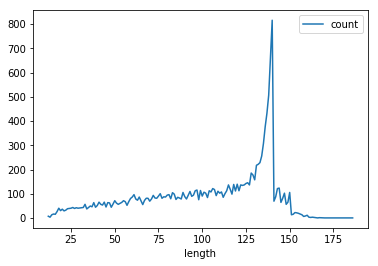

In [29]:
%matplotlib inline

from matplotlib import pyplot 


def display_length_plot(tweets_df):
    """
    Displays a plot of tweets' lengths for given DataFrame.
    :param tweets_df: DataFrame
    """
    lengths = tweets_df["text"].str.len()\
                               .reset_index(name="length")\
                               .groupby("length")\
                               .size()\
                               .reset_index(name="count")
    lengths.plot(x="length", y="count", kind="line")
    
display_length_plot(tweets)

We see how it looks like globally, but it might be also interesting to see if there is any difference between classes. The following lines of code display separate histogram for positive, negative and neutral entries:

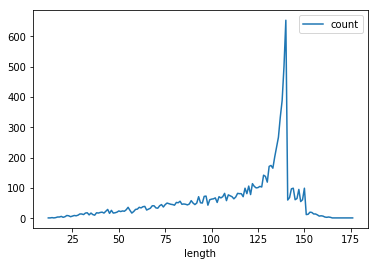

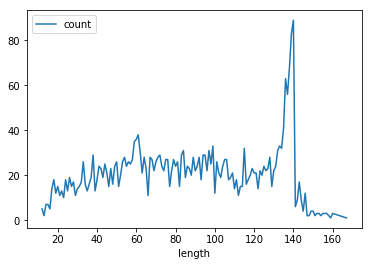

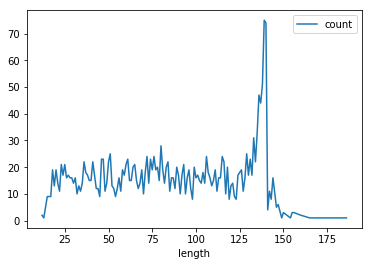

In [24]:
display_length_plot(tweets[tweets["sentiment"] == "negative"])
display_length_plot(tweets[tweets["sentiment"] == "neutral"])
display_length_plot(tweets[tweets["sentiment"] == "positive"])

Let's store the variable for futher usage with a magic function of Jupyter Notebook.

In [ ]:
%store tweets